# Visualizing the Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:\\Users\\hp\\OneDrive\\Desktop\\Weather Project\\DATA\\weather_cleaned.csv",  parse_dates=['Date_Time'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995879 entries, 0 to 995878
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Location          995879 non-null  object        
 1   Date_Time         995879 non-null  datetime64[ns]
 2   Temperature_C     995879 non-null  float64       
 3   Humidity_pct      995879 non-null  float64       
 4   Precipitation_mm  995879 non-null  float64       
 5   Wind_Speed_kmh    995879 non-null  float64       
 6   year              995879 non-null  int64         
 7   month             995879 non-null  int64         
 8   day               995879 non-null  int64         
 9   hour              995879 non-null  int64         
 10  day_of_week       995879 non-null  int64         
 11  is_weekend        995879 non-null  int64         
 12  season            995879 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(6), object(2)
memor

In [5]:
sns.set_style("whitegrid")  # Setting entire sheet style 

In [6]:
df.set_index('Date_Time',inplace = True)

In [7]:
# calculating avg of each numerical column on daily basis for diff time calc avg
daily_df = df[['Temperature_C', 'Precipitation_mm', 'Humidity_pct', 'Wind_Speed_kmh']].resample('D').mean()

* Line Plot of Temperature over Time

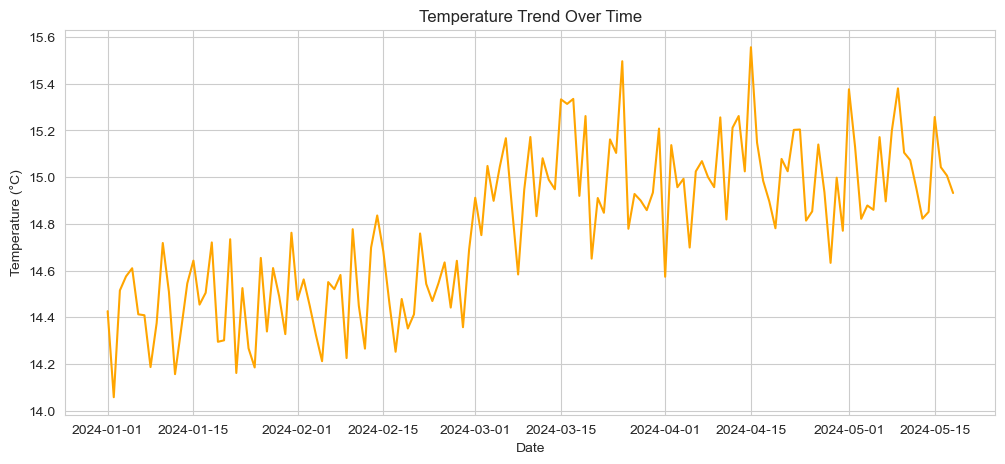

In [8]:
plt.figure(figsize=(12,5))
plt.plot(daily_df.index, daily_df['Temperature_C'], color='orange')
plt.title("Temperature Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()

## Temperature,Humidity,Wind_speed over time

#### Here the line plots with same a and y axis is distorted here we assign same x axis but seperate y axis 

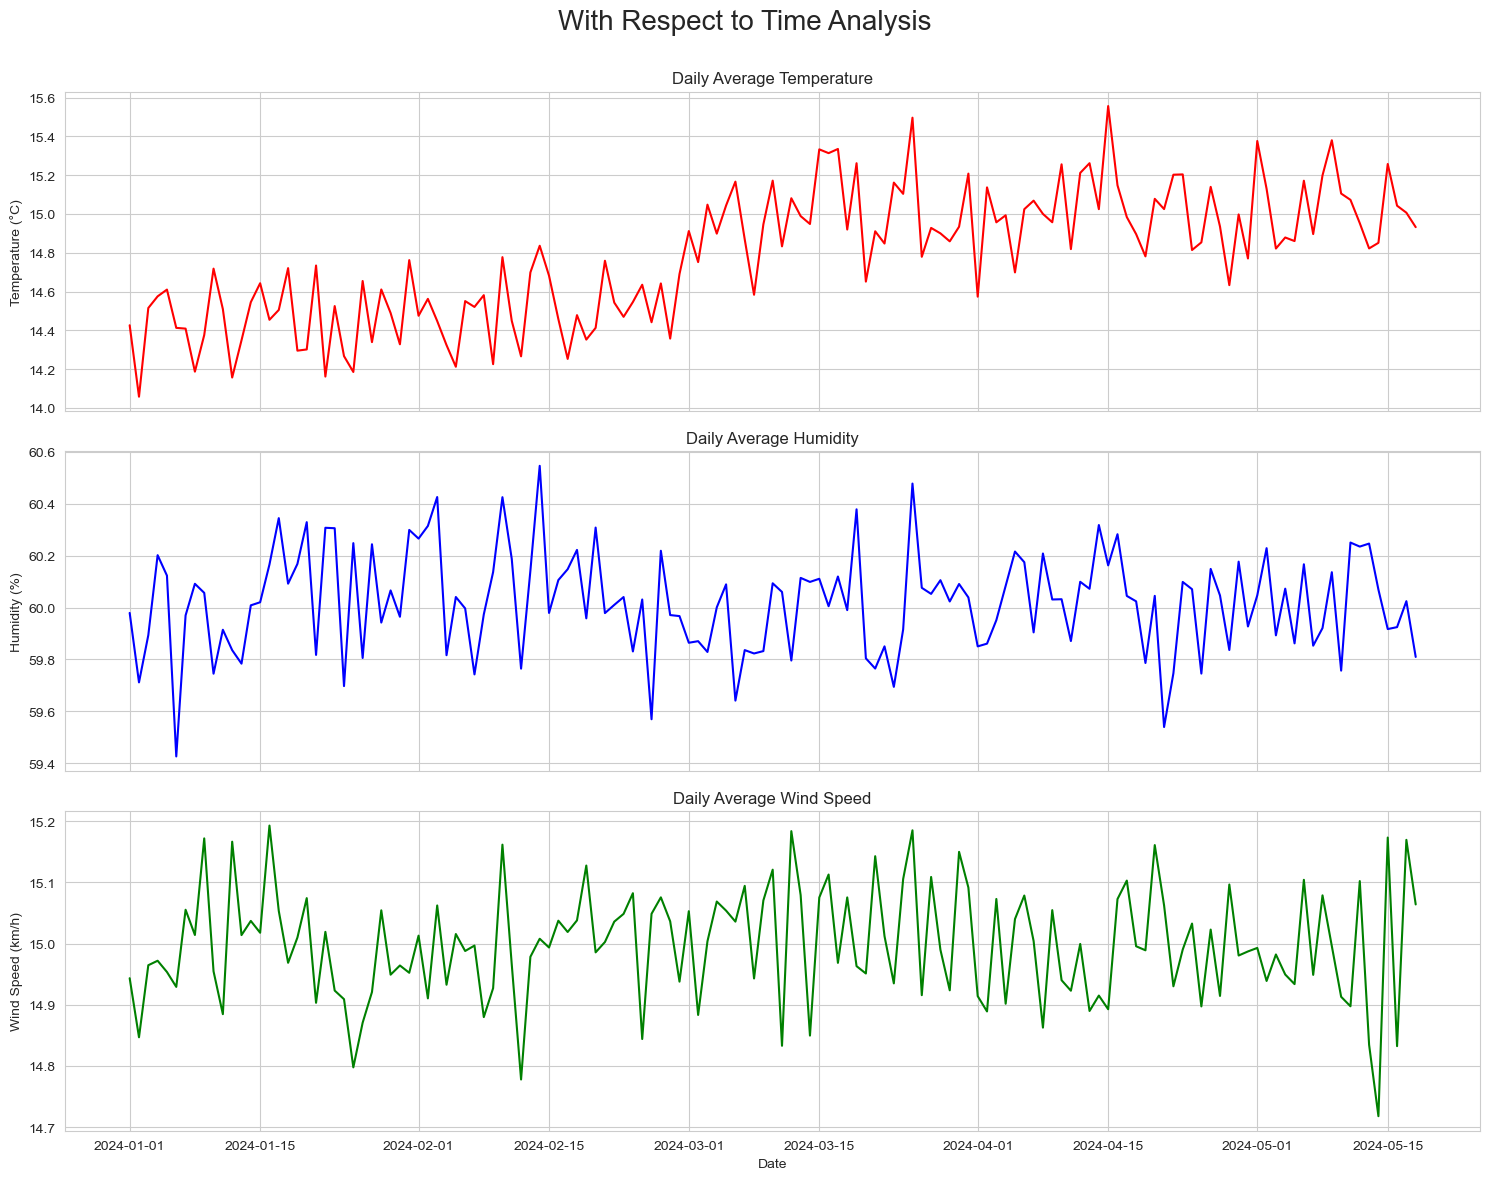

In [9]:
# Creating a figure with three subplots stacked vertically
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)

fig.suptitle("With Respect to Time Analysis\n",fontsize = 20)
# Plot Temperature
axes[0].plot(daily_df.index, daily_df['Temperature_C'], color='red')
axes[0].set_title('Daily Average Temperature')
axes[0].set_ylabel('Temperature (°C)')

# Plot Humidity
axes[1].plot(daily_df.index, daily_df['Humidity_pct'], color='blue')
axes[1].set_title('Daily Average Humidity')
axes[1].set_ylabel('Humidity (%)')

# Plot Wind Speed
axes[2].plot(daily_df.index, daily_df['Wind_Speed_kmh'], color='green')
axes[2].set_title('Daily Average Wind Speed')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Wind Speed (km/h)')

plt.tight_layout()
plt.show()

#### Data Analysis based on Season

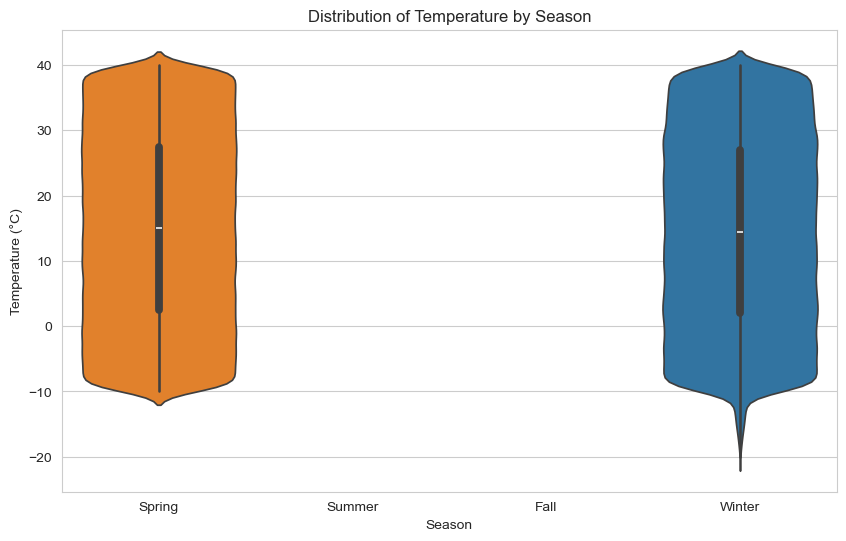

In [10]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='season', y='Temperature_C', data=df,hue = 'season', order=['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('Distribution of Temperature by Season')
plt.xlabel('Season')
plt.ylabel('Temperature (°C)')
plt.show()

In [11]:
df['season'].value_counts()

season
Spring    565899
Winter    429980
Name: count, dtype: int64

#### Violin plot to show distribution of wind speed across various cities

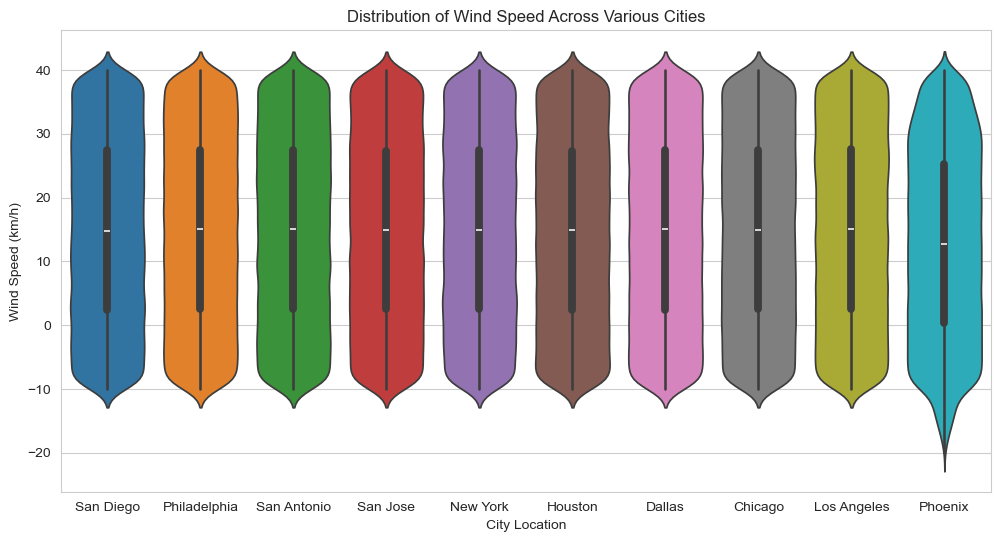

In [12]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Location', y='Temperature_C', data=df, hue = "Location")
plt.title('Distribution of Wind Speed Across Various Cities')
plt.xlabel('City Location')
plt.ylabel('Wind Speed (km/h)')
plt.show()

#### Checking distribution of value along with KDE

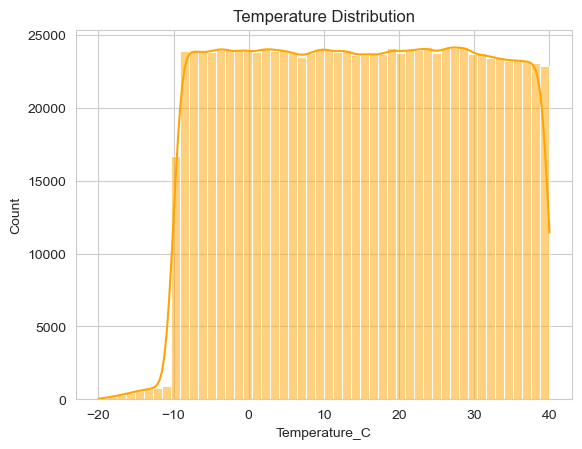

In [13]:
sns.histplot(df['Temperature_C'], bins=50, kde=True, color="orange")
plt.title("Temperature Distribution")
plt.show()

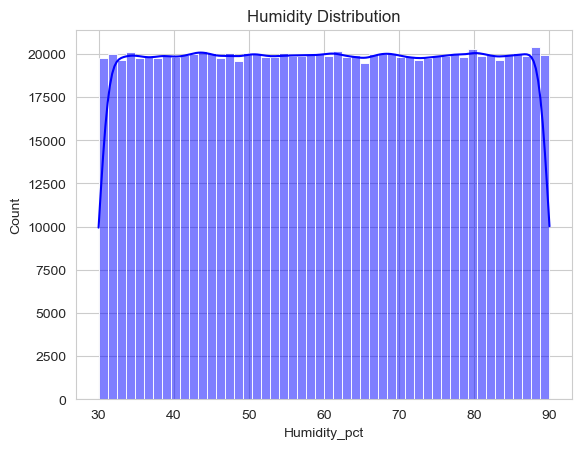

In [14]:
sns.histplot(df['Humidity_pct'], bins=50, kde=True, color="blue")
plt.title("Humidity Distribution")
plt.show()

#### City Wise Analysis 

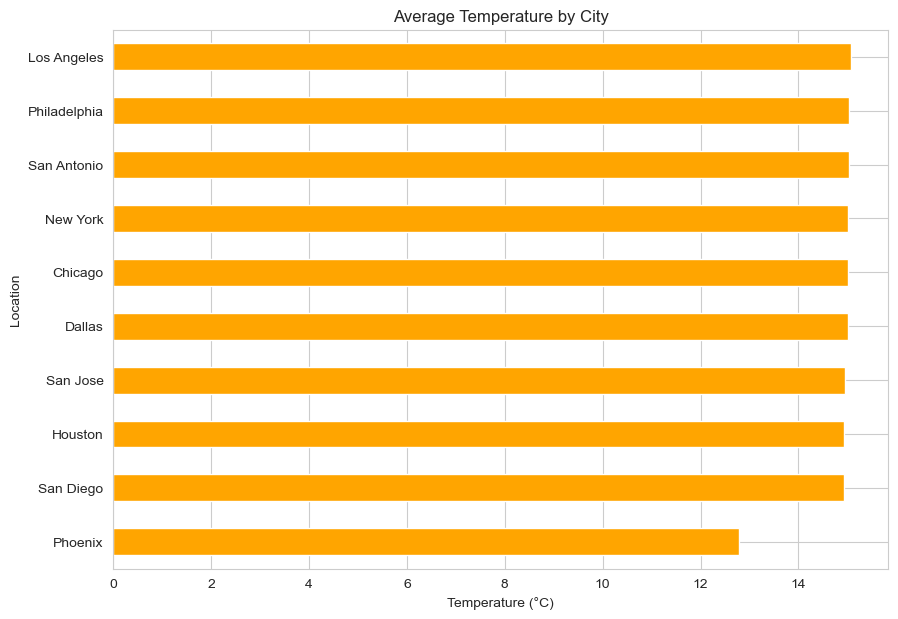

In [15]:
city_temp = df.groupby('Location')['Temperature_C'].mean().sort_values()

city_temp.plot(kind='barh', figsize=(10,7), color="orange")
plt.title("Average Temperature by City")
plt.xlabel("Temperature (°C)")
plt.show()

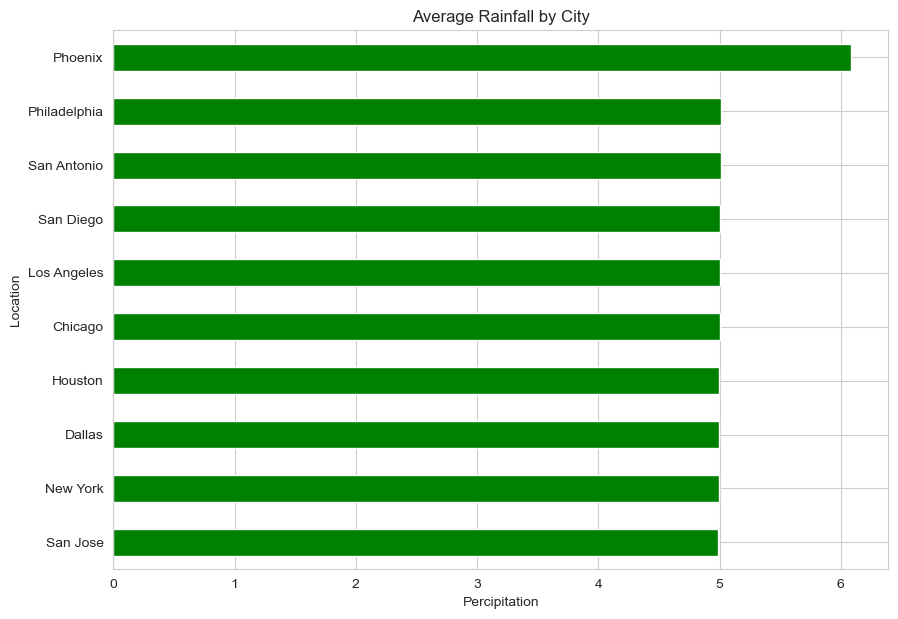

In [16]:
city_temp = df.groupby('Location')['Precipitation_mm'].mean().sort_values()

city_temp.plot(kind='barh', figsize=(10,7), color="green")
plt.title("Average Rainfall by City")
plt.xlabel("Percipitation")
plt.show()

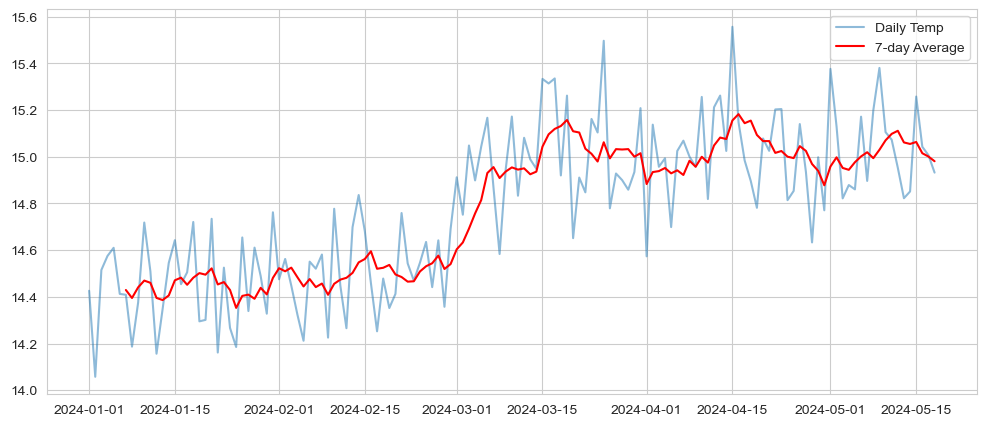

In [17]:
daily_df = df['Temperature_C'].resample('D').mean()
daily_ma7 = daily_df.rolling(7).mean()

plt.figure(figsize=(12,5))
plt.plot(daily_df.index, daily_df, alpha=0.5, label="Daily Temp")
plt.plot(daily_ma7.index, daily_ma7, color="red", label="7-day Average")
plt.legend()
plt.show()

#### HeatMap to show the correlation among all the variables

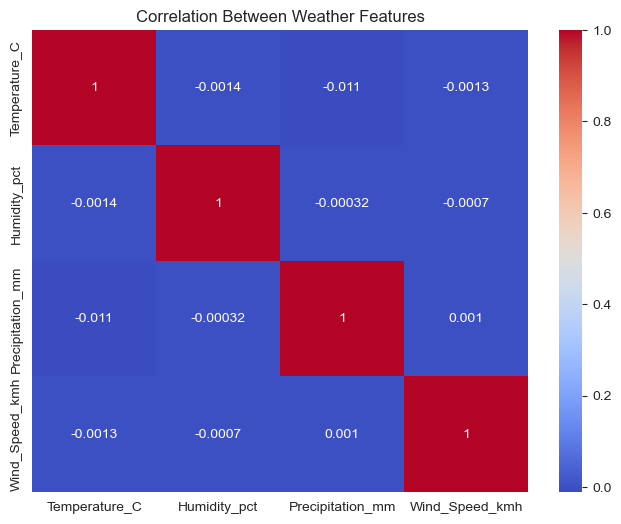

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Temperature_C','Humidity_pct','Precipitation_mm','Wind_Speed_kmh']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Between Weather Features")
plt.show()

#### A pair plot showing variations of every variable with each other

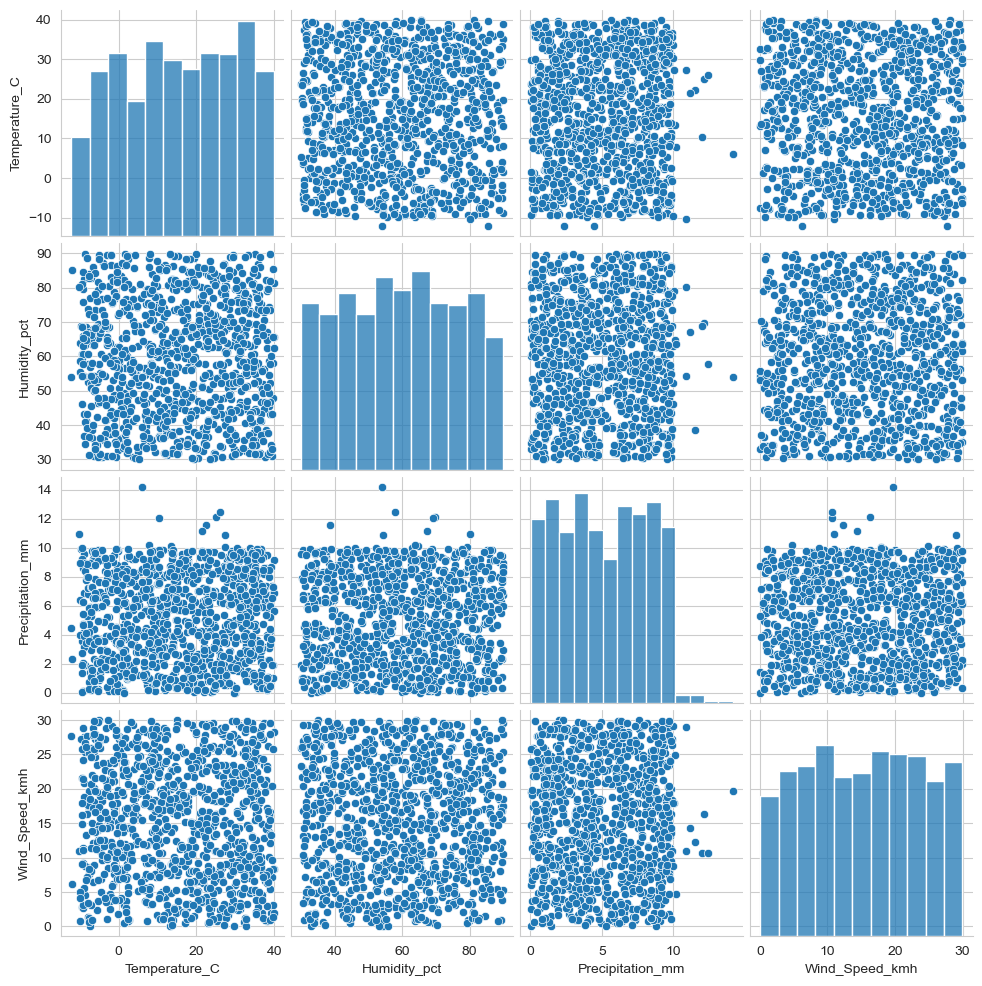

In [19]:
dummy_df = df.iloc[::1000]
sns.pairplot(dummy_df[['Temperature_C','Humidity_pct','Precipitation_mm','Wind_Speed_kmh']])
plt.show()